In [3]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.__version__)

3.8.3
3.8.3


In [5]:
#Load the dataset patients.csv into pandas dataframe
!pip install pandas==1.5.3
# import pkg_resources
# pkg_resources.require("pandas==1.5.3")
import pandas as pd
df = pd.read_csv('diabetic_data.csv')
print(pd.__version__)

1.5.3


In [6]:
#Show the shape of the data
df.shape

(101766, 50)

In [8]:
#Identify missing values in the columns. You will notice that there are some columns with the missing values, but those values are represented by a different character such as ‘?’. Replace them by NaN.
# Identify missing values represented by '?'
df.replace('?', pd.NA, inplace=True) #inplace needed for editing existing df (if false we have assign new variable for df)


In [9]:
print("Summary of Missing Values Before Replacement:")
print(df.isnull().sum())

Summary of Missing Values Before Replacement:
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
ac

In [10]:
#Delete the column ‘encounter_id’ (why axis =1 (whenever  row (axis=0) or a column (axis=1).))
df = df.drop('encounter_id', axis=1)


KeyError: "['encounter_id'] not found in axis"

In [11]:
# Display summary of missing values after replacement
print("\nSummary of Missing Values After Replacement:")
print(df.isnull().sum())


Summary of Missing Values After Replacement:
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
ac

In [12]:
#5th point
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})

# Display the updated 'readmitted' column
print(df['readmitted'].value_counts())

0    90409
1    11357
Name: readmitted, dtype: int64


In [13]:
# Display the data types of each column
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 

In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

In [15]:
# Drop columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index
df = df.drop(columns=columns_to_drop)

In [16]:
print("\nDataFrame after Dropping Columns with More than 90% Missing Values:")
print(df)


DataFrame after Dropping Columns with More than 90% Missing Values:
        patient_nbr             race  gender      age  admission_type_id  \
0           8222157        Caucasian  Female   [0-10)                  6   
1          55629189        Caucasian  Female  [10-20)                  1   
2          86047875  AfricanAmerican  Female  [20-30)                  1   
3          82442376        Caucasian    Male  [30-40)                  1   
4          42519267        Caucasian    Male  [40-50)                  1   
...             ...              ...     ...      ...                ...   
101761    100162476  AfricanAmerican    Male  [70-80)                  1   
101762     74694222  AfricanAmerican  Female  [80-90)                  1   
101763     41088789        Caucasian    Male  [70-80)                  1   
101764     31693671        Caucasian  Female  [80-90)                  2   
101765    175429310        Caucasian    Male  [70-80)                  1   

        discharge_

In [17]:
# List of near zero-variance columns to be deleted
columns_to_delete = [
    'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Drop the near zero-variance columns
df = df.drop(columns=columns_to_delete)

# Display the updated DataFrame after dropping columns
print("\nDataFrame after Dropping Near Zero-Variance Columns:")
print(df)


DataFrame after Dropping Near Zero-Variance Columns:
        patient_nbr             race  gender      age  admission_type_id  \
0           8222157        Caucasian  Female   [0-10)                  6   
1          55629189        Caucasian  Female  [10-20)                  1   
2          86047875  AfricanAmerican  Female  [20-30)                  1   
3          82442376        Caucasian    Male  [30-40)                  1   
4          42519267        Caucasian    Male  [40-50)                  1   
...             ...              ...     ...      ...                ...   
101761    100162476  AfricanAmerican    Male  [70-80)                  1   
101762     74694222  AfricanAmerican  Female  [80-90)                  1   
101763     41088789        Caucasian    Male  [70-80)                  1   
101764     31693671        Caucasian  Female  [80-90)                  2   
101765    175429310        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id 

In [18]:
# Drop rows with null values
df = df.dropna()

# Display the updated DataFrame after dropping rows
print("\nDataFrame after Dropping Rows with Null Values:")
print(df.head())


DataFrame after Dropping Rows with Null Values:
       patient_nbr       race  gender       age  admission_type_id  \
20446     20123568  Caucasian  Female   [70-80)                  1   
20737     20377854  Caucasian  Female   [60-70)                  2   
20824     20408121  Caucasian  Female  [90-100)                  1   
21083     20542797  Caucasian    Male   [70-80)                  1   
23879      7239654  Caucasian  Female   [70-80)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
20446                        22                    7                 7   
20737                         1                    1                 3   
20824                         1                    7                 4   
21083                         2                    7                10   
23879                         3                    6                12   

      payer_code           medical_specialty  ...  A1Cresult  metformin  \
20446     

In [19]:
#here we need to upload the histopgram or bar plot before using the iqr why we are using the method 


In [20]:
# we need to explain why we select the iqr method by ploting the histogram of the data and the colclusion over there 

import pandas as pd

def remove_outliers(df, columns):
    # Copy the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Iterate over specified columns and remove outliers using IQR method
    for col in columns:
        # Calculate the first and third quartiles
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and remove outliers
        outliers_mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        df_cleaned = df_cleaned[~outliers_mask]  # Remove rows with outliers

    return df_cleaned
# Columns to consider for outlier removal
columns_to_remove_outliers = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                              'num_medications', 'number_outpatient', 'number_emergency',
                              'number_inpatient','number_diagnoses']

# Call the function with the specified columns
df1 = remove_outliers(df, columns_to_remove_outliers)
print(df1)

        patient_nbr       race  gender       age  admission_type_id  \
20446      20123568  Caucasian  Female   [70-80)                  1   
20737      20377854  Caucasian  Female   [60-70)                  2   
20824      20408121  Caucasian  Female  [90-100)                  1   
21083      20542797  Caucasian    Male   [70-80)                  1   
23879       7239654  Caucasian  Female   [70-80)                  1   
...             ...        ...     ...       ...                ...   
101700    110596428  Caucasian  Female   [70-80)                  1   
101710     30370995      Other  Female   [30-40)                  2   
101720    180189752  Caucasian    Male   [50-60)                  2   
101735    106595208  Caucasian    Male   [70-80)                  2   
101764     31693671  Caucasian  Female   [80-90)                  2   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
20446                         22                    7                 7 

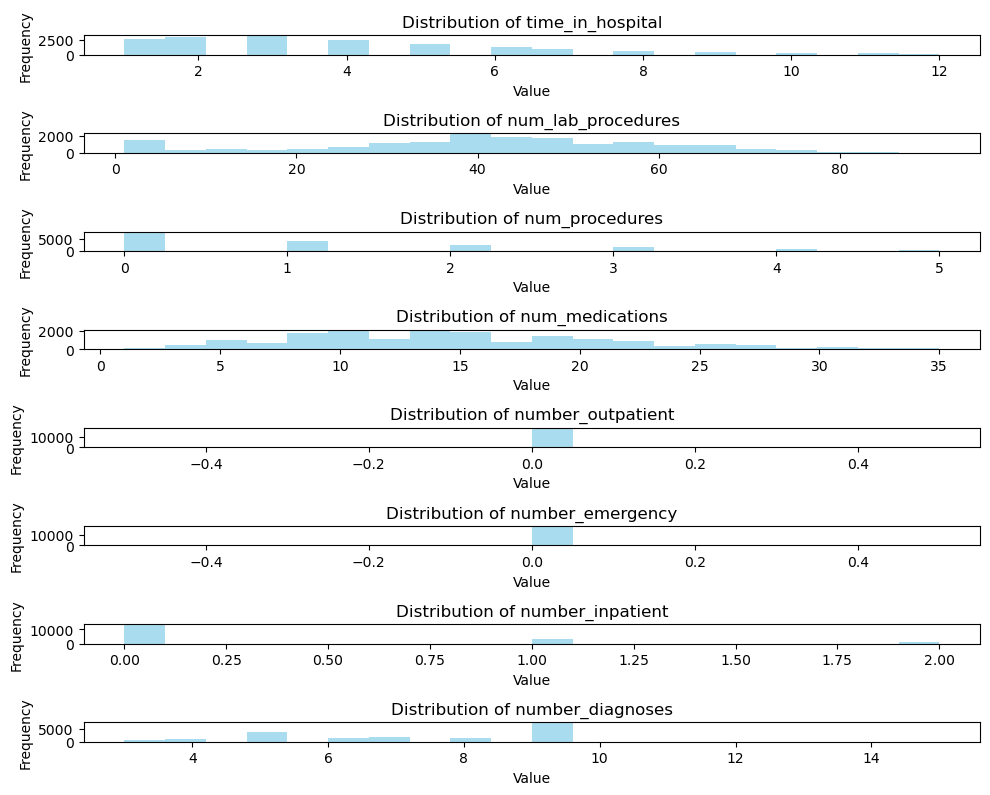

In [21]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'columns_of_interest' is a list of column names you want to plot
columns_of_interest = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                              'num_medications', 'number_outpatient', 'number_emergency',
                              'number_inpatient','number_diagnoses']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=1, figsize=(10, 8))

# Plot histograms for each column
for i, column in enumerate(columns_of_interest):
    ax = axes[i]
    ax.hist(df1[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


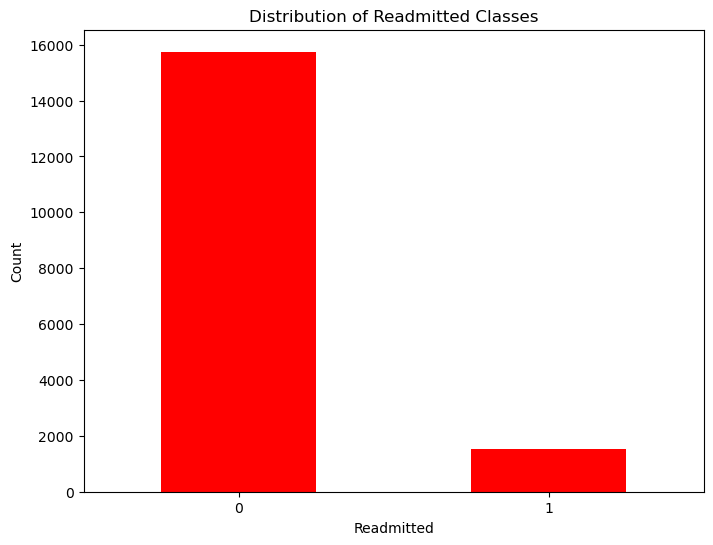

In [23]:
#Plot the distribution of unique classes of the target variable, i.e., readmitted.

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'readmitted' column
plt.figure(figsize=(8, 6))
df1['readmitted'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Readmitted Classes')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()



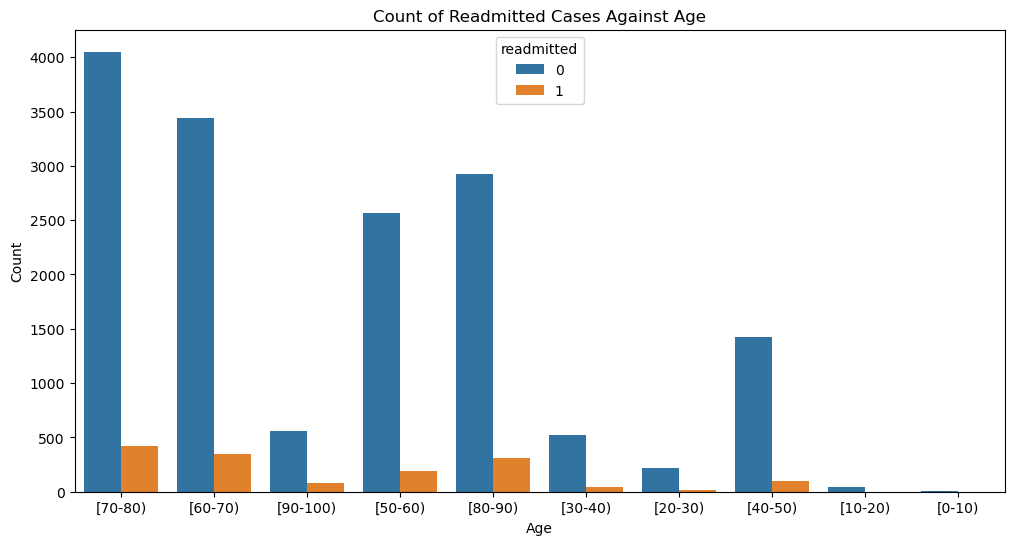

In [24]:
#Plot the count of number of readmitted cases against age.
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'readmitted' and 'age' columns
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='readmitted', data=df1)
plt.title('Count of Readmitted Cases Against Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


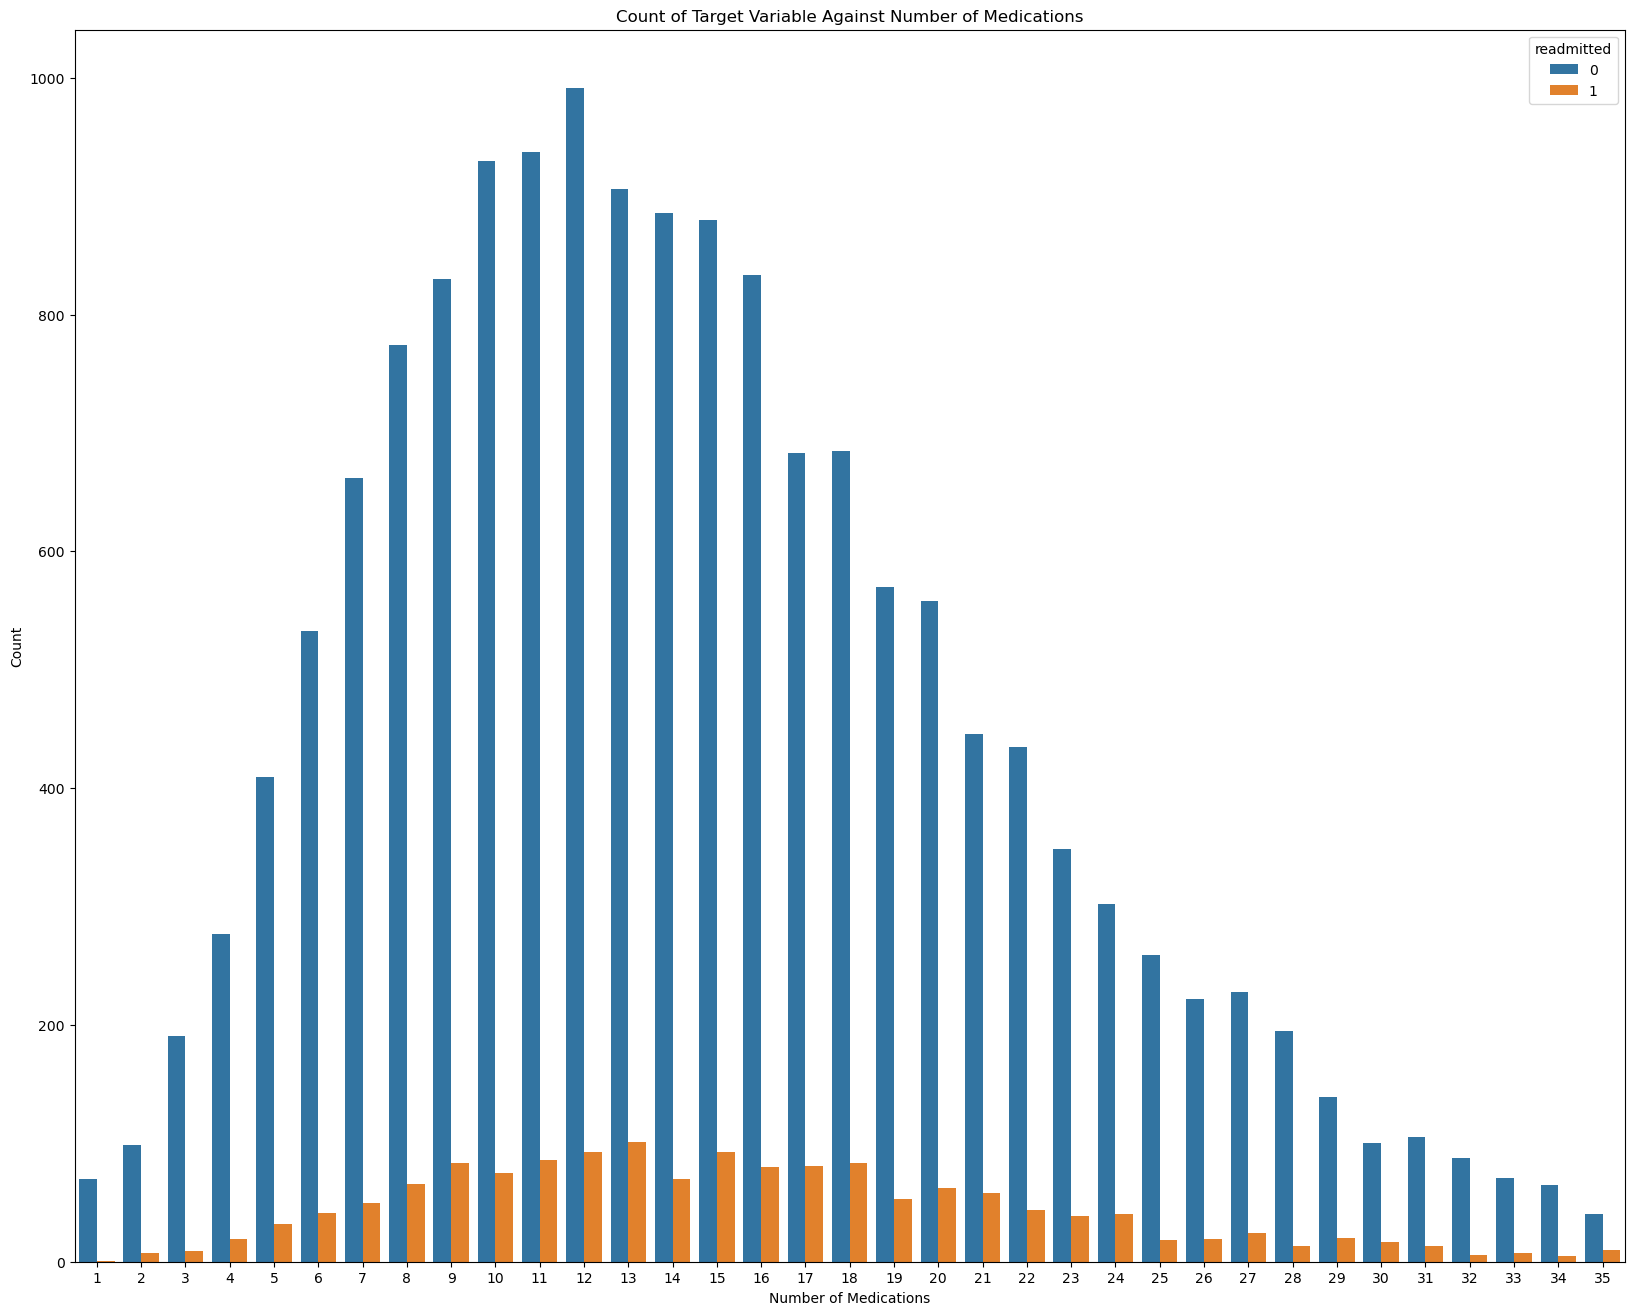

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'readmitted' and 'num_medications' columns
plt.figure(figsize=(20, 16))
sns.countplot(x='num_medications', hue='readmitted', data=df1)
plt.title('Count of Target Variable Against Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.show()


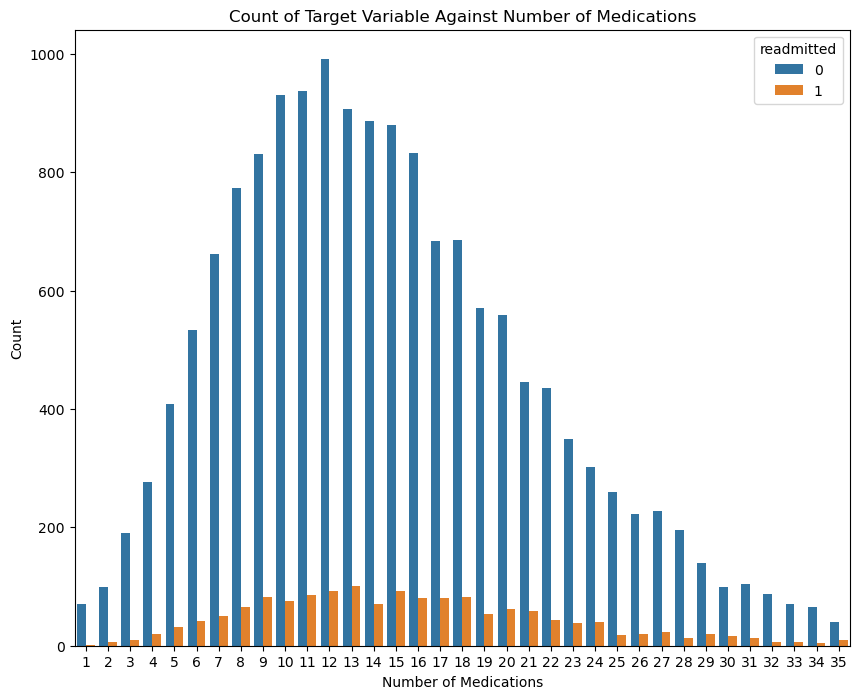

<Figure size 1000x800 with 0 Axes>

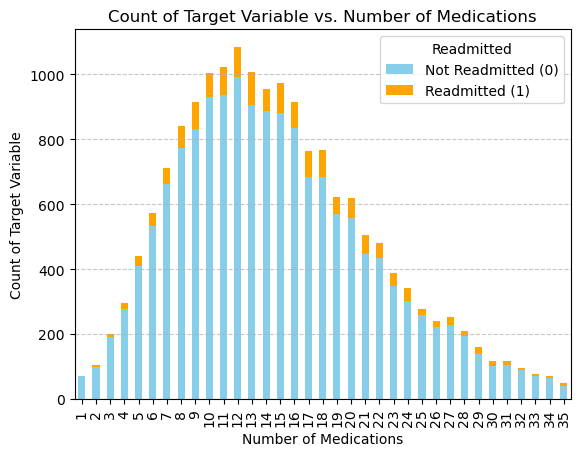

In [27]:
# Grouping the DataFrame by "num_medications" and counting the occurrences of "readmitted" for each group
# unstack() function is used to pivot the grouped data, filling NaN values with 0.
count_by_medication = df1.groupby("num_medications")["readmitted"].value_counts().unstack(fill_value=0)
 
# Defining custom colors for the plot
colors = ["skyblue", "orange"]
 
# Creating a new figure for plotting with a specific size
plt.figure(figsize=(10, 8))
 
# Creating a stacked bar plot using the grouped data
# Each bar represents the count of "readmitted" cases for each "num_medications" group
count_by_medication.plot(kind="bar", stacked=True, color=colors)
 
# Labeling the x-axis
plt.xlabel('Number of Medications')
 
# Labeling the y-axis
plt.ylabel('Count of Target Variable')
 
# Adding a title to the plot
plt.title('Count of Target Variable vs. Number of Medications')
 
# Adding grid lines along the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
# Creating a custom legend to explain the colors
# Labels are defined to correspond to "Not Readmitted (0)" and "Readmitted (1)"
plt.legend(title="Readmitted", labels=["Not Readmitted (0)", "Readmitted (1)"], loc="upper right")
 
# Displaying the plot
plt.show()

C:\Users\sunny\AppData\Local\Temp\ipykernel_15664\3357245774.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


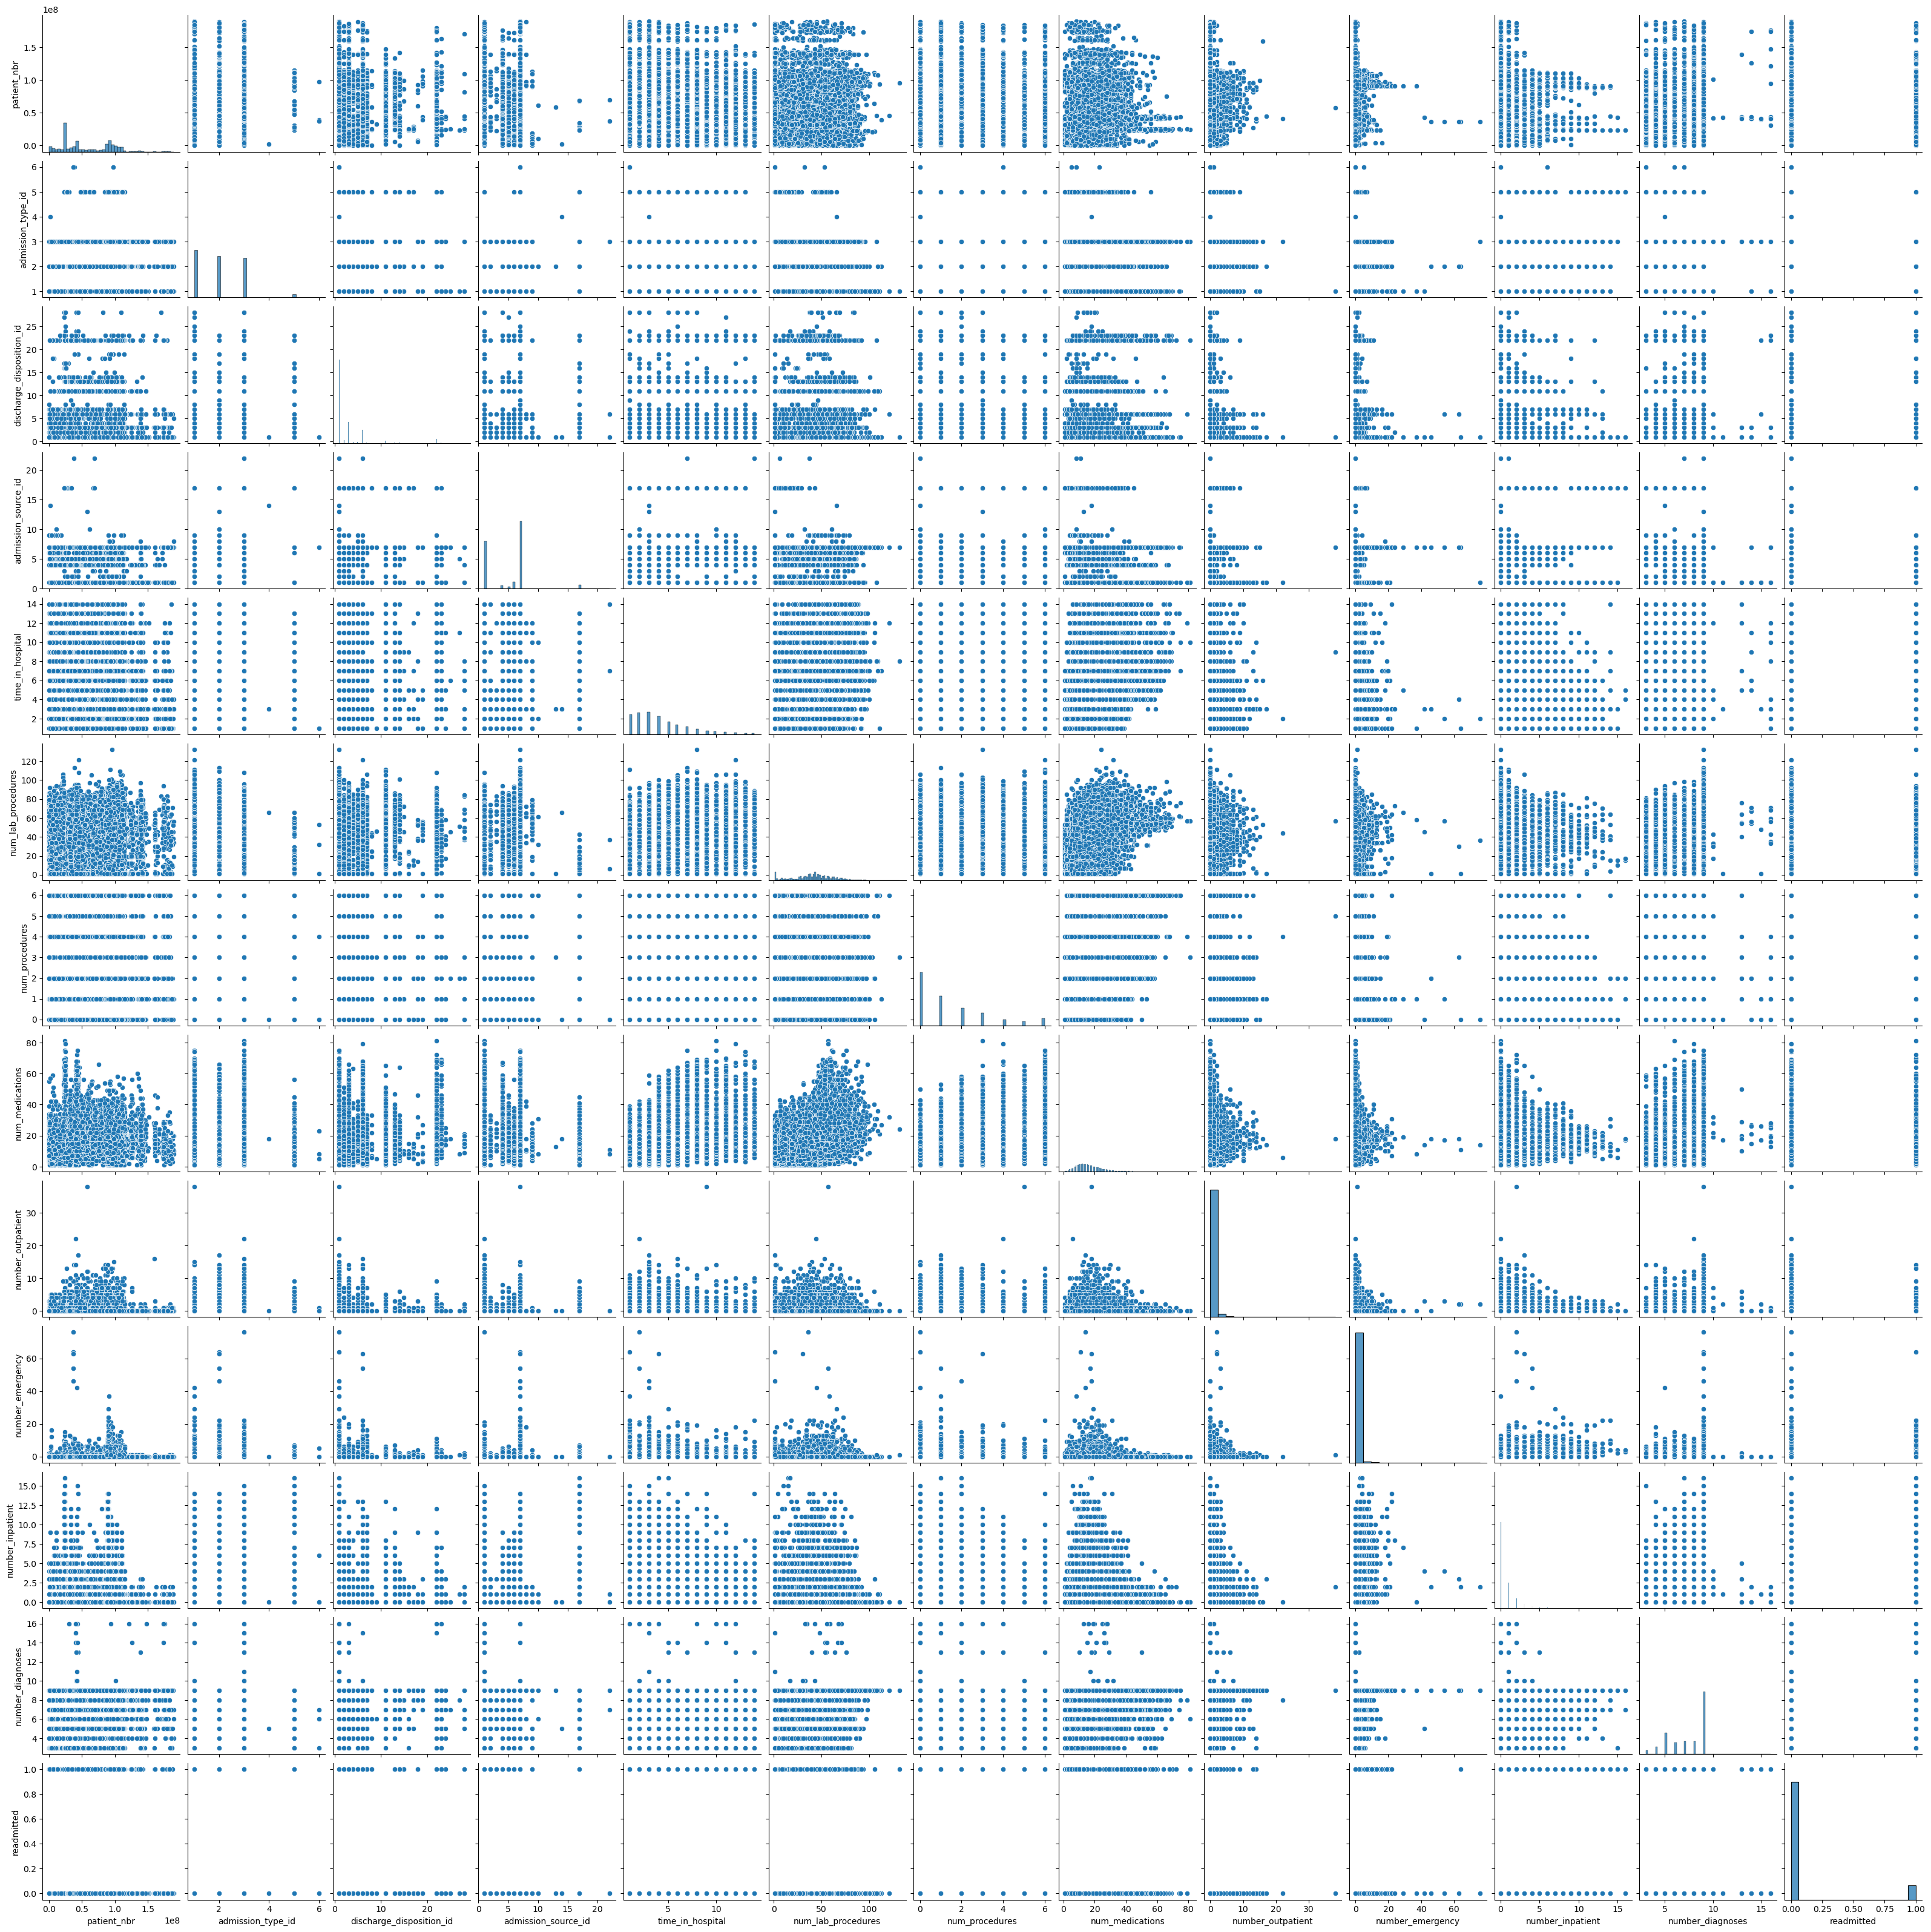

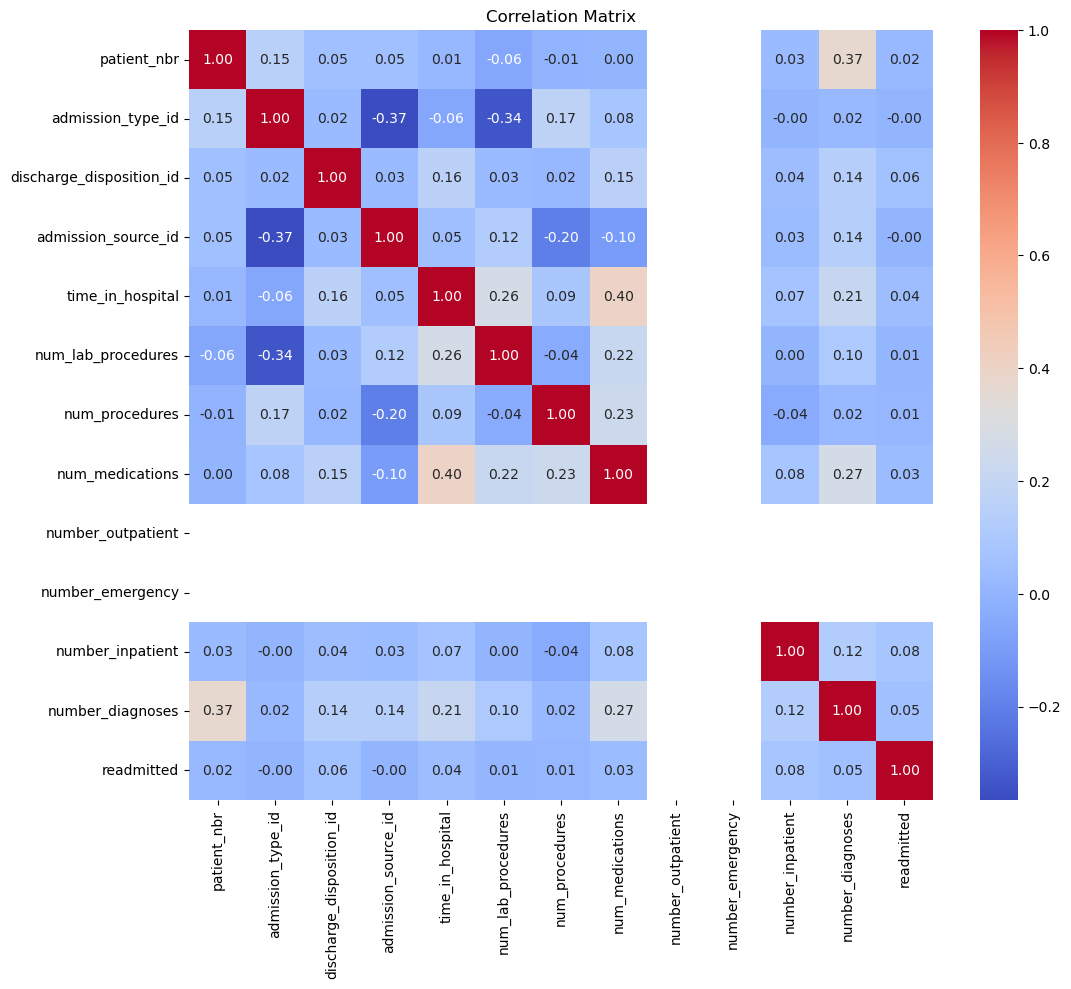

In [29]:
# Show the scatter matrix plot and the correlation matrix. This should be a very large matrix and you might find it difficult to analyse. Which pair of features are highly correlated?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Calculate correlation matrix
corr_matrix = df1.corr()

# Create a scatter matrix plot
sns.pairplot(df)
plt.show()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [31]:
import pandas as pd

# Calculate correlation matrix
corr_matrix = df1.corr(numeric_only=True)

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Identify pairs of features that are highly correlated
highly_correlated_pairs = []
threshold = 0.9  # Adjust the threshold as needed
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print highly correlated pairs
print("\nHighly Correlated Feature Pairs:")
for pair in highly_correlated_pairs:
    print(pair)


Correlation Matrix:
                          patient_nbr  admission_type_id  \
patient_nbr                  1.000000           0.147685   
admission_type_id            0.147685           1.000000   
discharge_disposition_id     0.054472           0.024041   
admission_source_id          0.050549          -0.365620   
time_in_hospital             0.013228          -0.061467   
num_lab_procedures          -0.057954          -0.338139   
num_procedures              -0.007072           0.170015   
num_medications              0.001443           0.082224   
number_outpatient                 NaN                NaN   
number_emergency                  NaN                NaN   
number_inpatient             0.027361          -0.002318   
number_diagnoses             0.366255           0.021469   
readmitted                   0.020403          -0.001134   

                          discharge_disposition_id  admission_source_id  \
patient_nbr                               0.054472             0

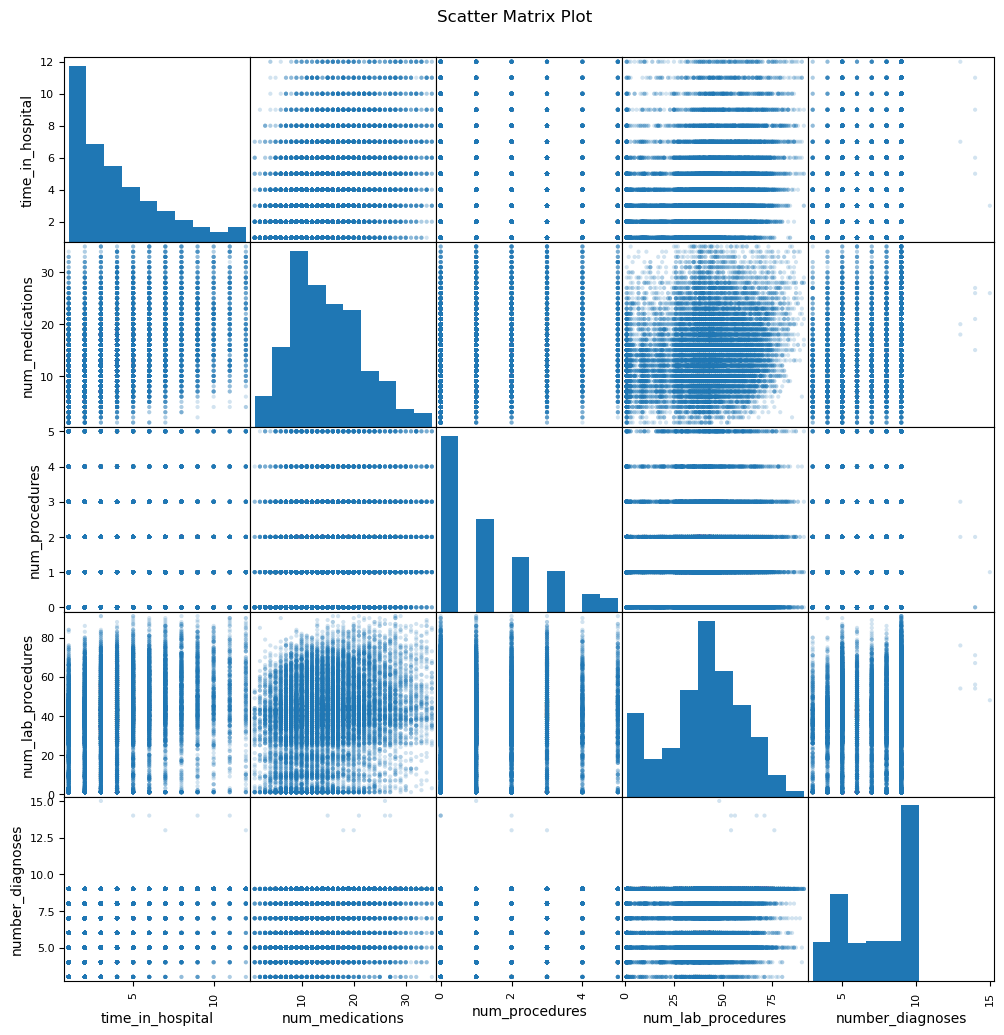

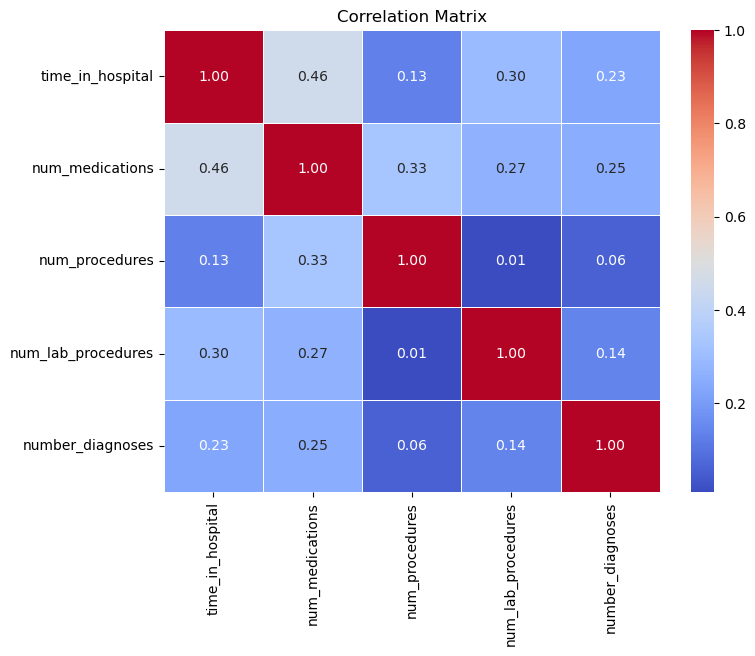

Highly Correlated Feature Pairs:
                    time_in_hospital  num_medications  num_procedures  \
time_in_hospital               False            False           False   
num_medications                False            False           False   
num_procedures                 False            False           False   
num_lab_procedures             False            False           False   
number_diagnoses               False            False           False   

                    num_lab_procedures  number_diagnoses  
time_in_hospital                 False             False  
num_medications                  False             False  
num_procedures                   False             False  
num_lab_procedures               False             False  
number_diagnoses                 False             False  


In [33]:
#Generate additional plots that demonstrate your understanding of the problem and the data. You are free to select the plot and features for visualisation. For better visualisationand understanding of data, consider using seaborn library.
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt



# Select a subset of columns for demonstration (adjust as needed)
subset_columns = ['time_in_hospital','num_medications', 'num_procedures', 'num_lab_procedures','number_diagnoses']

# Create a scatter matrix plot
scatter_matrix(df1[subset_columns], alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix Plot', y=0.92)
plt.show()

# Display the correlation matrix with seaborn heatmap
correlation_matrix = df[subset_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated pairs of features #why we select 0.7 threshold 
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)
print("Highly Correlated Feature Pairs:")
print(highly_correlated_pairs)


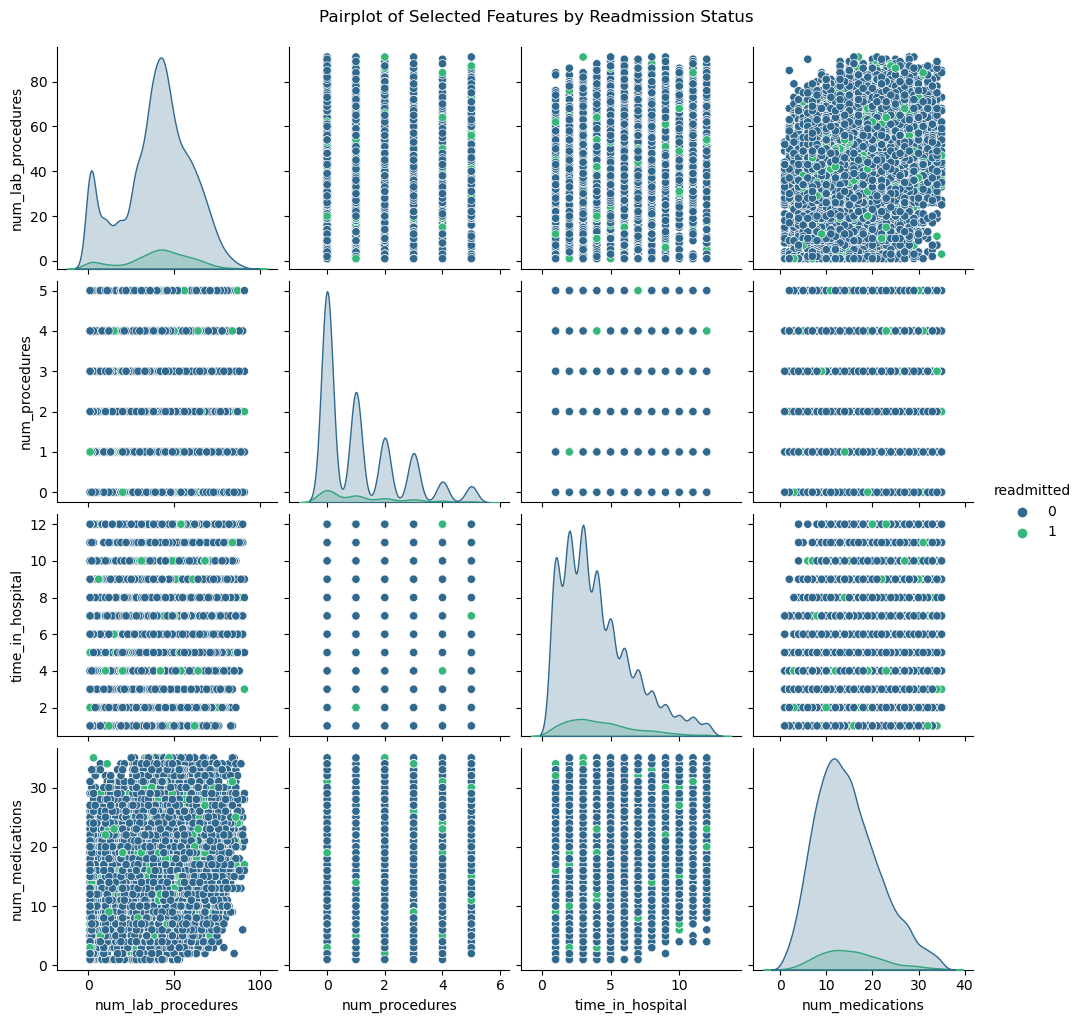

In [36]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
 
# Pairplot to visualize relationships between multiple variables
# Using seaborn's pairplot to create a grid of scatterplots for selected numeric features
# 'num_lab_procedures', 'num_procedures', 'time_in_hospital', 'num_medications'
# 'readmitted' is used to color points based on the 'readmitted' status
sns.pairplot(df1[['num_lab_procedures', 'num_procedures', 'time_in_hospital', 'num_medications', 'readmitted']],
             hue='readmitted', diag_kind='kde', palette='viridis')
 
# Adding a title to the pairplot
plt.suptitle('Pairplot of Selected Features by Readmission Status', y=1.02)
 
 
# Display the pairplot
plt.show()

## Model Building

In [39]:
import numpy as np
# Selecting the numeric columns from dataframe
numeric_df = df1.select_dtypes(include=[np.number])
print(numeric_df)

        patient_nbr  admission_type_id  discharge_disposition_id  \
20446      20123568                  1                        22   
20737      20377854                  2                         1   
20824      20408121                  1                         1   
21083      20542797                  1                         2   
23879       7239654                  1                         3   
...             ...                ...                       ...   
101700    110596428                  1                         3   
101710     30370995                  2                         1   
101720    180189752                  2                         1   
101735    106595208                  2                         6   
101764     31693671                  2                         3   

        admission_source_id  time_in_hospital  num_lab_procedures  \
20446                     7                 7                  58   
20737                     1                 3

In [40]:
# Selecting the numeric columns from dataframe
numeric_df = df1.select_dtypes(include=[np.number])
 
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
 
# Print correlation of each feature with the target variable 'readmitted'
print(correlation_matrix['readmitted'].sort_values(ascending=False))

readmitted                  1.000000
number_inpatient            0.079828
discharge_disposition_id    0.059871
number_diagnoses            0.050847
time_in_hospital            0.038100
num_medications             0.033823
patient_nbr                 0.020403
num_procedures              0.009523
num_lab_procedures          0.005099
admission_type_id          -0.001134
admission_source_id        -0.001423
number_outpatient                NaN
number_emergency                 NaN
Name: readmitted, dtype: float64


In [41]:
# Selecting the categorial columns from dataframe
cat_df = df1.select_dtypes(include=[object])

In [42]:
# One-hot encode categorical variables
df2 = pd.get_dummies(df1, columns=cat_df.columns)

In [47]:
df2

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,rosiglitazone_Steady,rosiglitazone_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
20446,20123568,1,22,7,7,58,2,15,0,0,...,0,0,0,0,1,0,1,0,0,1
20737,20377854,2,1,1,3,59,3,11,0,0,...,0,0,0,0,1,0,0,1,0,1
20824,20408121,1,1,7,4,56,1,9,0,0,...,0,0,0,1,0,0,0,1,0,1
21083,20542797,1,2,7,10,68,1,18,0,0,...,0,0,0,0,1,0,1,0,0,1
23879,7239654,1,3,6,12,77,5,19,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101700,110596428,1,3,6,3,39,0,16,0,0,...,0,0,0,0,1,0,0,1,0,1
101710,30370995,2,1,7,3,30,1,10,0,0,...,0,0,0,0,1,0,1,0,0,1
101720,180189752,2,1,7,5,71,5,23,0,0,...,0,0,1,0,0,0,1,0,0,1
101735,106595208,2,6,7,6,46,5,14,0,0,...,0,0,0,0,0,1,1,0,0,1


In [49]:
df2[df2['readmitted']==1]

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,rosiglitazone_Steady,rosiglitazone_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
24091,23464296,5,2,17,9,17,1,11,0,0,...,0,0,0,1,0,0,0,1,1,0
24223,28863117,1,6,17,3,7,1,9,0,0,...,0,0,0,0,1,0,0,1,0,1
24247,14151519,2,3,1,9,64,3,13,0,0,...,0,0,0,0,1,0,1,0,0,1
24420,15574617,1,1,6,4,48,0,6,0,0,...,0,0,0,0,1,0,0,1,0,1
24514,24004449,5,1,17,2,22,1,18,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101384,98449092,2,1,7,4,42,0,12,0,0,...,1,0,0,1,0,0,1,0,0,1
101386,125286431,2,1,1,4,20,0,19,0,0,...,1,0,0,1,0,0,1,0,0,1
101437,90092583,1,22,7,4,54,1,14,0,0,...,0,0,0,1,0,0,0,1,1,0
101582,91148022,2,6,7,2,1,1,10,0,0,...,0,0,0,1,0,0,0,1,1,0


In [44]:
# Separate predictors and target variable
X = df2.drop('readmitted', axis=1)
y = df2['readmitted']

In [46]:
# Importing necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif
 
# Selecting the top 5 features using Univariate feature selection
# Here, f_classif is used as the score function, which computes the ANOVA F-value for the provided dataset
selector = SelectKBest(score_func=f_classif, k=5)
 
# Transforming the input features (X) to get the selected features (X_selected)
X_selected = selector.fit_transform(X, y)
 
# Getting the names of the selected features
# This gets the column names of X (the original dataset) that were selected by the selector
selected_features = X.columns[selector.get_support()]
 
# Printing the selected feature names
print(selected_features)


Index(['discharge_disposition_id', 'number_inpatient', 'number_diagnoses',
       'diag_1_V58', 'diabetesMed_Yes'],
      dtype='object')


C:\Users\sunny\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sunny\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [50]:
# Assuming df is your DataFrame containing predictors and the target variable 'readmitted'

# Calculate correlation matrix
corr_matrix = df1.corr()

# Select predictors with absolute correlation coefficient above a threshold
threshold = 0.1  # Adjust as needed
selected_predictors = corr_matrix['readmitted'][abs(corr_matrix['readmitted']) > threshold].index.tolist()

print("Selected Predictors:", selected_predictors)


Selected Predictors: ['readmitted']


C:\Users\sunny\AppData\Local\Temp\ipykernel_15664\3380521086.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


In [52]:
import pandas as pd


# Calculate correlation matrix with numeric_only set to True
corr_matrix = df1.corr(numeric_only=True)

# Select predictors with absolute correlation coefficient above a threshold
threshold = 0.05  # Adjust as needed
selected_predictors = corr_matrix['readmitted'][abs(corr_matrix['readmitted']) > threshold].index.tolist()

print("Selected Predictors:", selected_predictors)


Selected Predictors: ['discharge_disposition_id', 'number_inpatient', 'number_diagnoses', 'readmitted']


In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
# Select predictors (features) and target variable
X = df1[['discharge_disposition_id', 'number_inpatient', 'number_diagnoses']]  # Replace with your selected predictors
y = df1['readmitted']  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()

# Evaluate the model using cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error (MSE) on Test Set:", mse)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)


Mean Squared Error (MSE) on Test Set: 0.08247340788698067
Cross-Validation Scores: [-0.07747533 -0.07803435 -0.0832936  -0.07646448 -0.07786564]


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Compute predictions
y_pred = model.predict(X_test)

# Compute different performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the computed metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [58]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Set:", mse)

# Compute classification predictions (convert regression output to binary)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute classification performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Mean Squared Error (MSE) on Test Set: 0.08247340788698067
Accuracy: 0.9079328314997105
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


C:\Users\sunny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined from the previous steps

# Undersample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Oversample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train the model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with balanced data:", accuracy)


Accuracy with balanced data: 0.684134337000579


In [60]:
!pip install imbalanced-learn


     -------------------------------------- 257.7/257.7 kB 5.4 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
